First upload world_happiness to your Google Drive.

Then mount the drive with the following:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


After uploading, we open the file.

Go into the file with the following:

In [ ]:
%cd "drive/MyDrive/world_happiness/"

[Errno 2] No such file or directory: 'drive/MyDrive/world_happiness/'
/content/drive/MyDrive/world_happiness


Set up step:

1. Import our necessary libraries.
2. Load in the data files into variables for further use.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
def load_dataset(path):
  dataset = pd.read_csv(path)
  return dataset

In [ ]:
# Dataframe formats:
data_2015 = load_dataset('2015.csv')
data_2016 = load_dataset('2016.csv')
data_2017 = load_dataset('2017.csv')
data_2018 = load_dataset('2018.csv')
data_2019 = load_dataset('2019.csv')

# List formats for convenience:
li_2015 = list(data_2015)
li_2016 = list(data_2016)
li_2017 = list(data_2017)
li_2018 = list(data_2018)
li_2019 = list(data_2019)

**EDA** (10 points):

Get familiar with the dataset and decide what features and observations will be useful. Make
good use of visualizations. Specific tasks may include but are not limited to:
1. Merge and clean the data. Explain what you did.
2. What are the central tendencies of happiness score over the years? Did they increase or
decrease?
3. Which countries have stable rankings over the years? Which countries improved their
rankings?
4. Visualize the relationship between happiness score and other features such as GDP,
social support, freedom, etc.
5. Find out what features contribute to happiness. If you are the president of a country, what would you do to make citizens happier?

In [ ]:
# Number 1. Merging data. We could average out the values and include columns if they simply aren't included before.
data_2015["Year"] = 2015
data_2016["Year"] = 2016
data_2017["Year"] = 2017
data_2018["Year"] = 2018
data_2019["Year"] = 2019

# Renaming inconsistent column names for ease of use
data_2017.rename(columns={'Happiness.Rank': 'Happiness Rank',
                          'Happiness.Score': 'Happiness Score',
                          'Whisker.high': 'Whisker (High)',
                          'Whisker.low': 'Whisker (Low)',
                          'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)',
                          'Health..Life.Expectancy.': 'Health (Life Expectancy)',
                          'Trust..Government.Corruption.': 'Trust (Government Corruption)',
                          'Dystopia.Residual': 'Dystopia Residual'}, inplace=True)

data_2018.rename(columns={'Overall rank': "Happiness Rank",
                          'Country or region': 'Country',
                          'Score': 'Happiness Score',
                          'GDP per capita': 'Economy (GDP per Capita)',
                          'Social support': 'Social Support',
                          'Healthy life expectancy': 'Health (Life Expectancy)',
                          'Freedom to make life choices': 'Freedom',
                          'Perceptions of corruption': 'Trust (Government Corruption)'}, inplace=True)

data_2019.rename(columns={'Overall rank': "Happiness Rank",
                          'Country or region': 'Country',
                          'Score': 'Happiness Score',
                          'GDP per capita': 'Economy (GDP per Capita)',
                          'Social support': 'Social Support',
                          'Healthy life expectancy': 'Health (Life Expectancy)',
                          'Freedom to make life choices': 'Freedom',
                          'Perceptions of corruption': 'Trust (Government Corruption)'}, inplace=True)

# Find all unique column names which will be the columns of the merged DataFrame
cols = data_2017.columns.append(data_2018.columns).append(data_2016.columns).append(data_2019.columns).append(data_2015.columns)
unique_cols = []
for name in cols:
  if name not in unique_cols:
    unique_cols.append(name)

# If a dataframe doesn't have a column, add column to ensure all dataframes have the same number of columns.
# Values in the newly added column are 0 for now.
for name in unique_cols:
  if name not in data_2015.columns:
    data_2015[name] = 0
  if name not in data_2016.columns:
    data_2016[name] = 0
  if name not in data_2017.columns:
    data_2017[name] = 0
  if name not in data_2018.columns:
    data_2018[name] = 0
  if name not in data_2019.columns:
    data_2019[name] = 0

# Clean up data

# Set "Social Support" for Countries based on 2019 since there is no data for before 2019
ss15 = [0 for i in range(len(data_2015))]
ss16 = [0 for i in range(len(data_2016))]
ss17 = [0 for i in range(len(data_2017))]
ss18 = [0 for i in range(len(data_2018))]

for country in data_2019["Country"]:
  if country in list(data_2015["Country"]):
    i = data_2015.index[data_2015["Country"] == country]
    j = data_2019.index[data_2019["Country"] == country]
    ss15[i[0]] = data_2019["Social Support"][j[0]]

for country in data_2019["Country"]:
  if country in list(data_2016["Country"]):
    i = data_2016.index[data_2016["Country"] == country]
    j = data_2019.index[data_2019["Country"] == country]
    ss16[i[0]] = data_2019["Social Support"][j[0]]

for country in data_2019["Country"]:
  if country in list(data_2017["Country"]):
    i = data_2017.index[data_2017["Country"] == country]
    j = data_2019.index[data_2019["Country"] == country]
    ss17[i[0]] = data_2019["Social Support"][j[0]]

for country in data_2019["Country"]:
  if country in list(data_2018["Country"]):
    i = data_2018.index[data_2018["Country"] == country]
    j = data_2019.index[data_2019["Country"] == country]
    ss18[i[0]] = data_2019["Social Support"][j[0]]

data_2015["Social Support"] = ss15
data_2016["Social Support"] = ss16
data_2017["Social Support"] = ss17
data_2018["Social Support"] = ss18

# Merge data frames
merged_data = pd.concat([data_2015,data_2016,data_2017,data_2018,data_2019])

# Dropping the statistical columns because they are based on factors that can't be replaced/predicted
merged_data = merged_data.drop(["Region", "Whisker (High)", "Whisker (Low)", "Lower Confidence Interval", "Upper Confidence Interval"], axis=1)

# Imputing any 0 values with the mean of the column.
for col in merged_data.columns:
  if col != "Country" and col != "Region":
    merged_data[col].replace(0, merged_data[col].mean(), inplace=True)

# Change nan values in Trust (Government Corruption) to 0
ss = []
for s in merged_data["Trust (Government Corruption)"]:
  if np.isnan(s):
    ss.append(0)
  else:
    ss.append(s)

merged_data["Trust (Government Corruption)"] = ss

merged_data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Social Support
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,78.698210,5.379018,0.017395,0.921905,0.834984,0.616331,0.413719,0.126238,0.219973,1.759592,2016.993606,1.217370
std,45.182384,1.127456,0.017169,0.400649,0.309887,0.243394,0.149277,0.105268,0.121056,0.599671,1.417364,0.277866
min,1.000000,2.693000,0.009675,0.015300,0.104190,0.005565,0.005890,0.000000,0.001990,0.328580,2015.000000,0.378000
25%,40.000000,4.509750,0.009675,0.622672,0.595221,0.449298,0.312000,0.055067,0.134000,1.257771,2016.000000,1.098000
50%,79.000000,5.322000,0.009675,0.982205,0.698400,0.647310,0.431000,0.092655,0.203505,1.598425,2017.000000,1.265000
75%,118.000000,6.189500,0.009675,1.236187,1.082465,0.808000,0.531000,0.155861,0.278832,2.202105,2018.000000,1.452000
max,158.000000,7.769000,0.136930,2.096000,1.610574,1.141000,0.724000,0.551910,0.838075,3.837720,2019.000000,1.624000


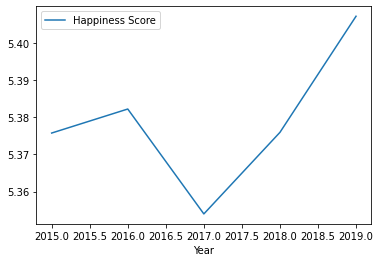

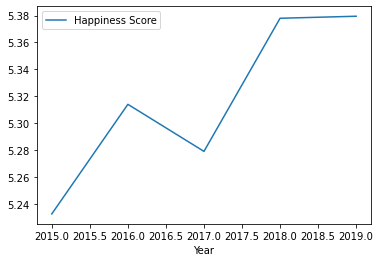

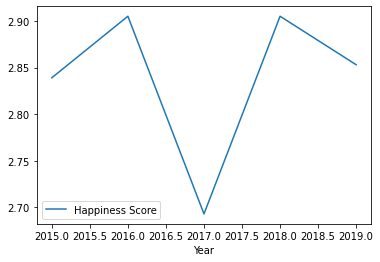

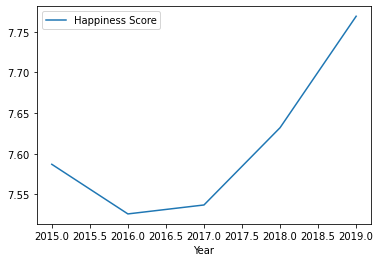

In [ ]:
# 2) What are the central tendencies of happiness score over the years? Did they increase or decrease?

# Gets the mean of every column based on Year
data_group_by_year_mean = merged_data.groupby(["Year"]).mean()
data_group_by_year_mean["Year"] = [2015,2016,2017,2018,2019]

# Gets the median of every column based on Year
data_group_by_year_median = merged_data.groupby(["Year"]).median()
data_group_by_year_median["Year"] = [2015,2016,2017,2018,2019]

# Gets the mean of every column based on Year
data_group_by_year_max = merged_data.groupby(["Year"]).max()
data_group_by_year_max["Year"] = [2015,2016,2017,2018,2019]

# Gets the median of every column based on Year
data_group_by_year_min = merged_data.groupby(["Year"]).min()
data_group_by_year_min["Year"] = [2015,2016,2017,2018,2019]

data_group_by_year_mean.plot(x="Year", y="Happiness Score")
data_group_by_year_median.plot(x="Year", y="Happiness Score")
data_group_by_year_min.plot(x="Year", y="Happiness Score")
data_group_by_year_max.plot(x="Year", y="Happiness Score")

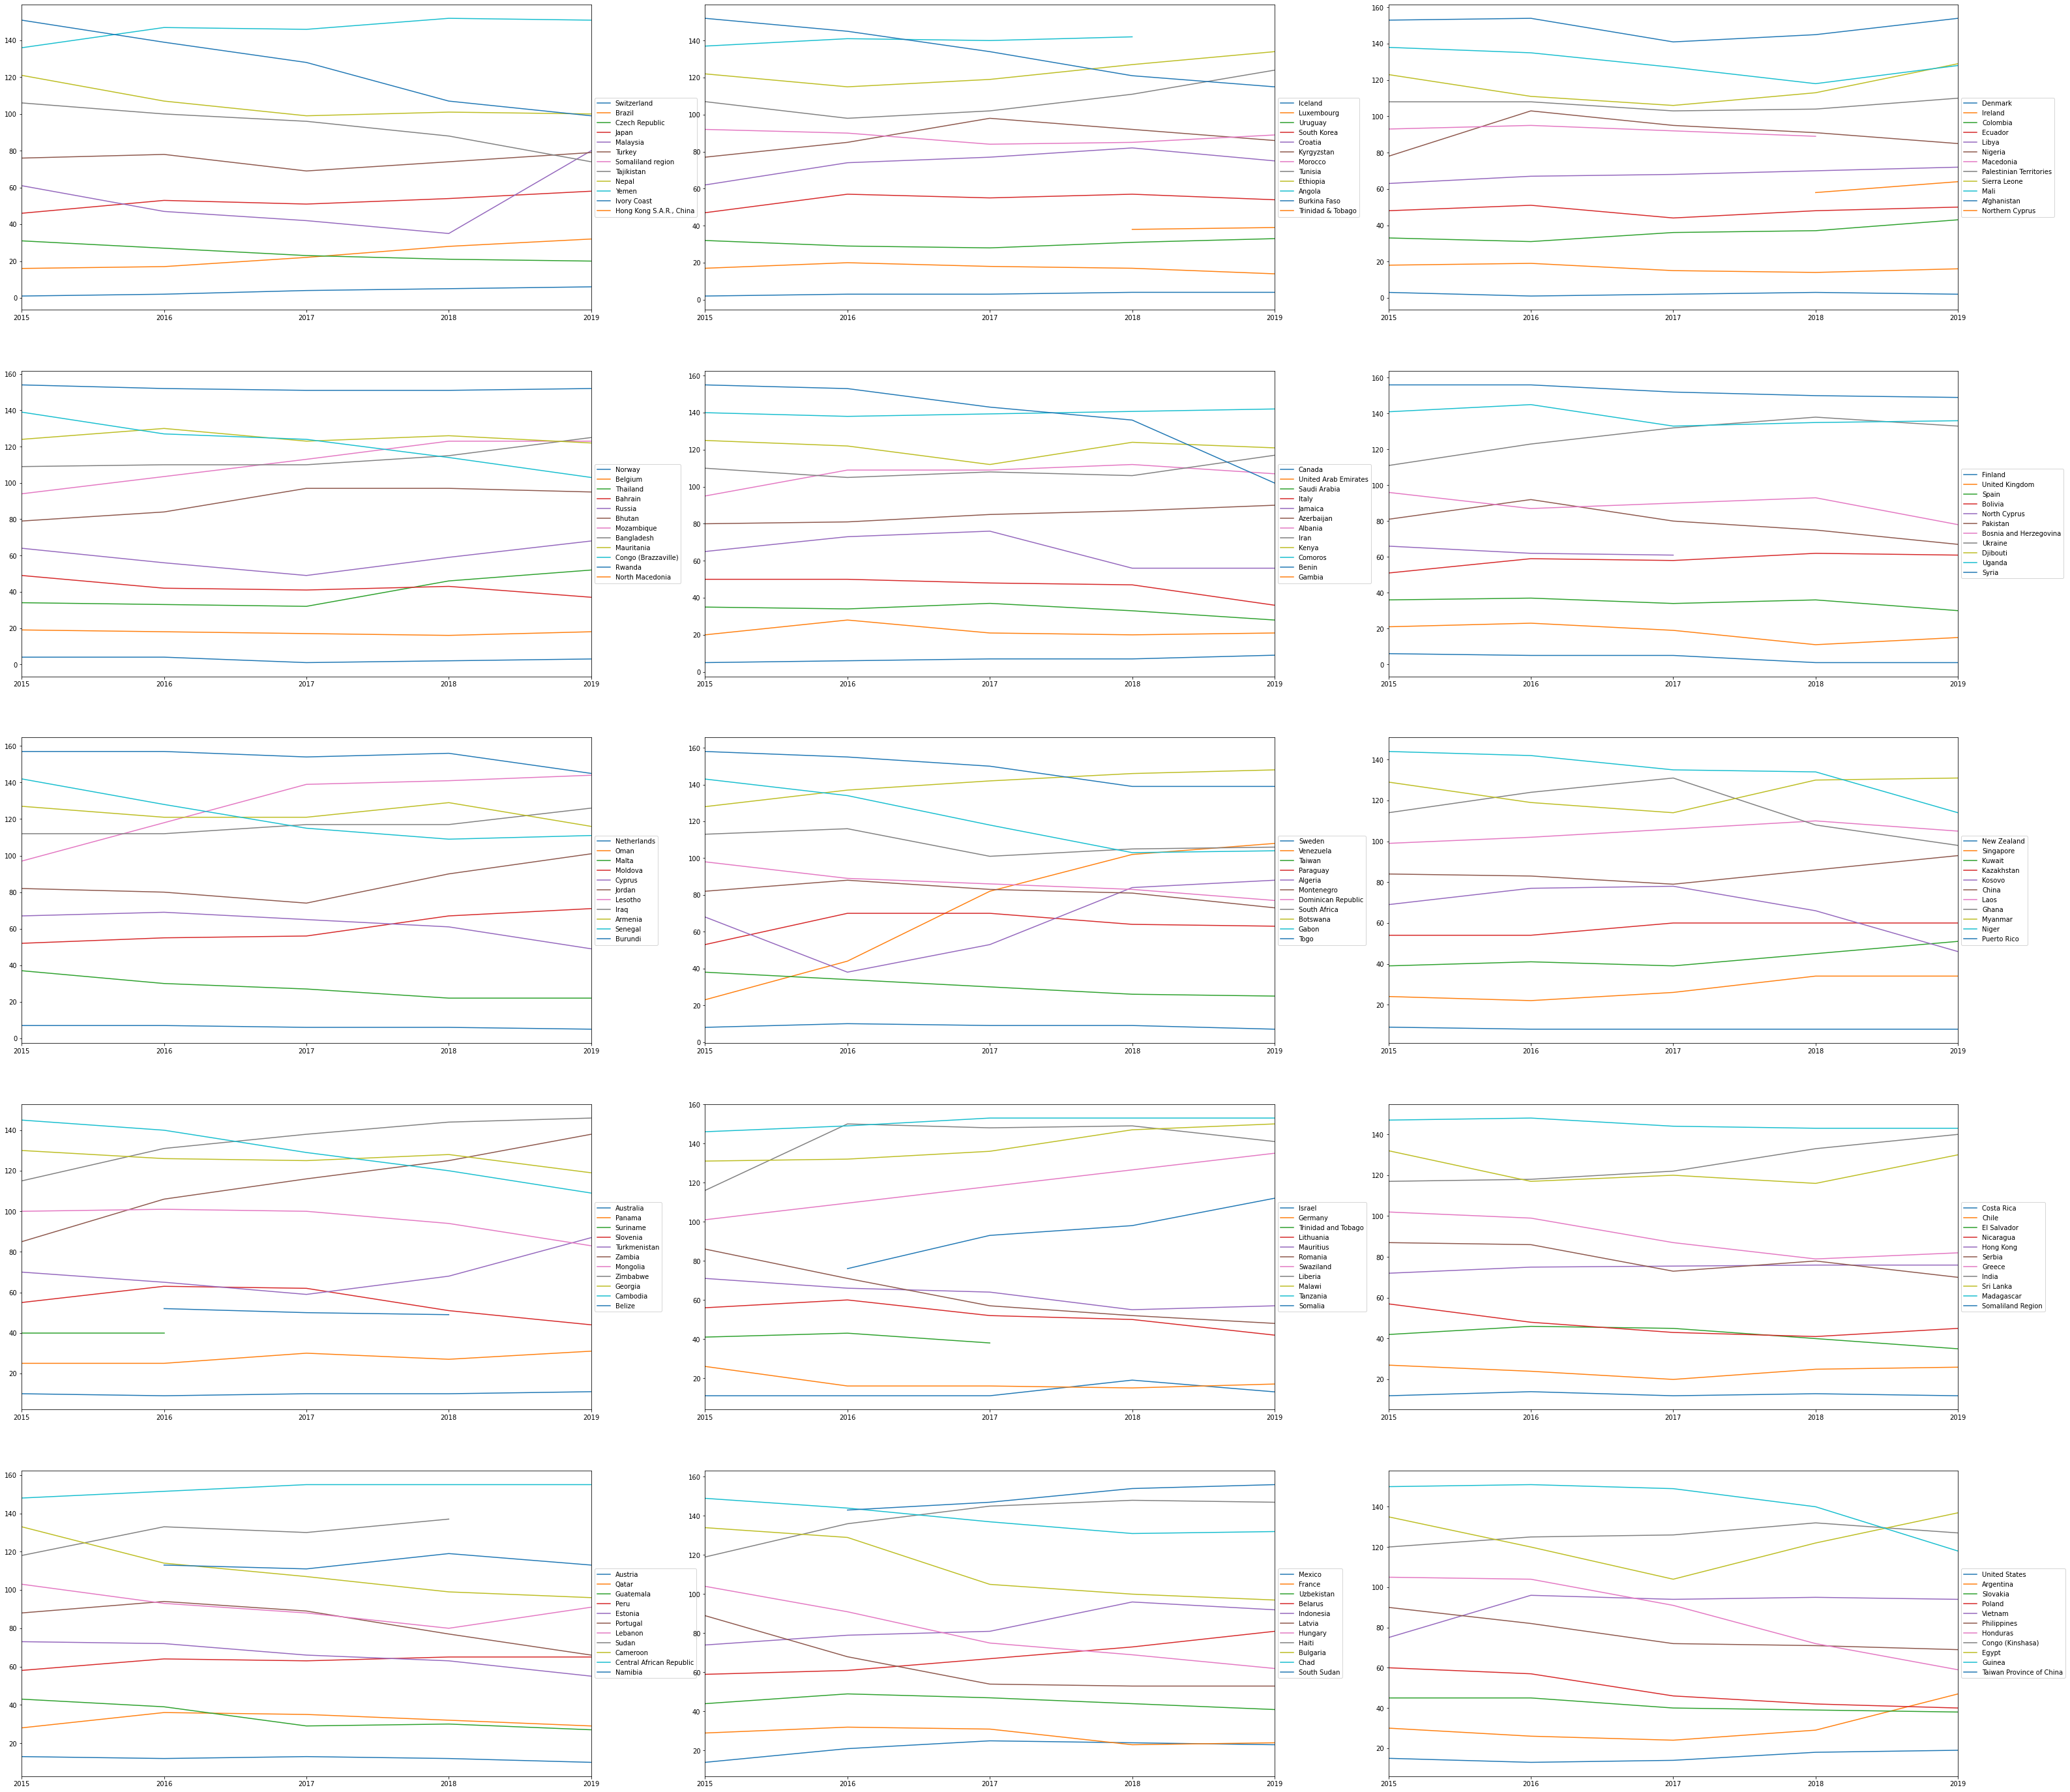

In [ ]:
# 3) Which countries have stable rankings over the years? Which countries improved their rankings?
unique_countries = merged_data["Country"].unique()

fig, ax = plt.subplots(5,3, figsize=(30,50))
i = 0
j = 0
for country in unique_countries:
  if j > 2:
    j = 0
  if i > 4:
    i = 0
  country_rank_by_year = merged_data.loc[merged_data['Country'] == country][['Happiness Rank', 'Year']]
  ax[i,j].plot(country_rank_by_year['Year'], country_rank_by_year['Happiness Rank'], label=country)
  
  j += 1
  if j > 2:
    i += 1

plt.subplots_adjust(right=1.5)

for i in range(5):
  for j in range(3):
    ax[i, j].set_xlim([2015, 2019])
    ax[i,j].set_xticks([2015, 2016, 2017, 2018, 2019])
    ax[i, j].legend(bbox_to_anchor=(1, 0.5), loc='center left')

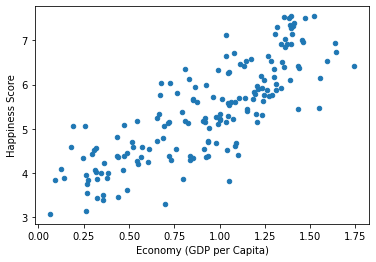

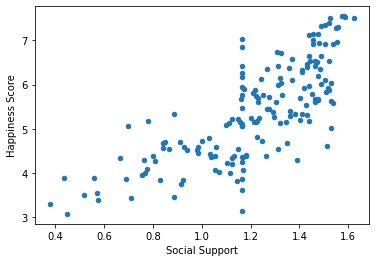

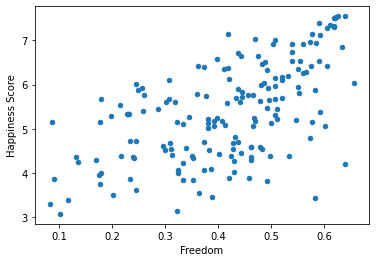

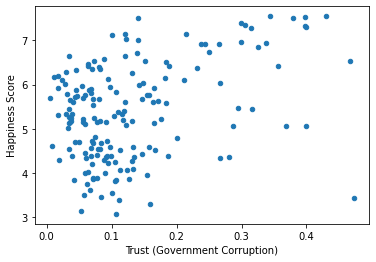

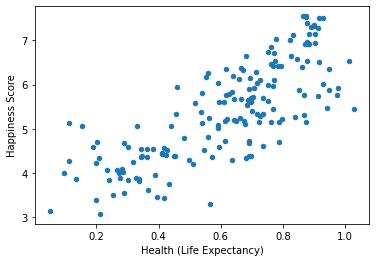

In [ ]:
# 4) Visualize the relationship between happiness score and other features such as GDP, social support, freedom, etc.

# Possible points of data entry:
data_group_by_year_mean = merged_data.groupby(["Country"]).mean()
# data_group_by_year_mean = merged_data.groupby(["Country"]).median()

# GDP
data_group_by_year_mean.plot.scatter(x="Economy (GDP per Capita)", y="Happiness Score")
# data_group_by_year_median.plot.scatter(x="Economy (GDP per Capita)", y="Happiness Score")

# Social Support
data_group_by_year_mean.plot.scatter(x="Social Support", y="Happiness Score")
# data_group_by_year_median.plot.scatter(x="Social Support", y="Happiness Score")

# Freedom
data_group_by_year_mean.plot.scatter(x="Freedom", y="Happiness Score")
# data_group_by_year_median.plot.scatter(x="Freedom", y="Happiness Score")

# I also believe Corruption and Health will have impacts on Happiness Score

# Corruption
data_group_by_year_mean.plot.scatter(x="Trust (Government Corruption)", y="Happiness Score")
# data_group_by_year_median.plot.scatter(x="Trust (Government Corruption)", y="Happiness Score")

# Health
data_group_by_year_mean.plot.scatter(x="Health (Life Expectancy)", y="Happiness Score")
# data_group_by_year_median.plot.scatter(x="Trust (Government Corruption)", y="Happiness Score")

5) Find out what features contribute to happiness. If you are the president of a country, what would you do to make citizens happier?

Based on the graphs from #4, I believe that a lot of features contribute to the happiness of citizens.
1. Countries with **higher** GDPs had **higher** corresponding happiness.
2. Countries with **higher** Social Support had **higher** corresponding happiness.
3. Countries with **higher** freedom **generally** had **higher** corresponding happiness.
4. Happiness exists whether or not citizens **trust** the government. I believe this might be because in some countries where citizens are controlled by the government to limit their perception on the world, they are actually happier from the lack of outside world knowledge. Similarly, countries with a lot of free speech and open criticism are happy even when there is high perceived corruption simply because they live in a more free country.
5. Countries with **higher** life expectancies and greater health overall had **higher** corresponding happiness.

As a president of a country, I would prioritize economic growth, social support, inherent rights and freedoms, and health and environment policies to ensure that my citizens will be happier.

In [ ]:
merged_data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Social Support
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,78.698210,5.379018,0.017395,0.921905,0.834984,0.616331,0.413719,0.126238,0.219973,1.759592,2016.993606,1.217370
std,45.182384,1.127456,0.017169,0.400649,0.309887,0.243394,0.149277,0.105268,0.121056,0.599671,1.417364,0.277866
min,1.000000,2.693000,0.009675,0.015300,0.104190,0.005565,0.005890,0.000000,0.001990,0.328580,2015.000000,0.378000
25%,40.000000,4.509750,0.009675,0.622672,0.595221,0.449298,0.312000,0.055067,0.134000,1.257771,2016.000000,1.098000
50%,79.000000,5.322000,0.009675,0.982205,0.698400,0.647310,0.431000,0.092655,0.203505,1.598425,2017.000000,1.265000
75%,118.000000,6.189500,0.009675,1.236187,1.082465,0.808000,0.531000,0.155861,0.278832,2.202105,2018.000000,1.452000
max,158.000000,7.769000,0.136930,2.096000,1.610574,1.141000,0.724000,0.551910,0.838075,3.837720,2019.000000,1.624000


**Modeling and Question Answering** (10 points):

The happiness rankings in the datasets are determined by happiness scores only. Now we want
to predict the ranking using a machine learning approach. Build three models based on data
from year 2015 to year 2018. Explain how each model works (briefly introduce the machine
learning algorithms behind them). Predict the happiness ranking for the year 2019 (drop the
“overall rank” and “score” columns first). Compare your rankings to the original rankings in
“2019.csv”. How does each model perform? Invent your own formula to calculate happiness
score using features of your choice.

In [ ]:
# Model 1: Linear Regression from scratch

#Feature scaling which removes the units of all the different features. Brings them in the range [0, 1]
def normalize(data):

    #the equation for the feature scaling is x' = (x - min(x)) / (max(x) -min(x))
    for i in range(1,len(data[0])):
        min = np.min(data[:,i])
        max = np.max(data[:,i])
        if(max - min != 0):
          data[:,i] = (data[:,i] - min) / (max - min)
        else:
          data[:,i] = 0.5
    
    return data

#Cost function
def cost(predictions, actuals):

    #Returns (1/2n) * sum((predictions - actuals)^2)
    err = predictions - actuals
    err_sq = np.square(err)
    mean_sq_err = np.sum(err_sq) / len(predictions)
    root_mean_sq_err = np.sqrt(mean_sq_err)
    return root_mean_sq_err

#Gradient descent is used to calculate how much to alter the weights by
def grad_descent(x, predictions, actual, alpha):

    error = predictions - actual
    return (alpha * 2 / len(predictions)) * x.T.dot(error)

#Calculates predictions by taking the dot product between the training data and the weights
def predict(x, weights):
    return x.dot(weights)

#Trains the model based on training data, learning rate, and number of epochs.
#Returns calibrated weights.
def train(epochs, train_x, train_y, alpha):
    weights = np.zeros(len(train_x[0]))

    for i in range(epochs):
        predictions = predict(train_x, weights)
        grad = grad_descent(train_x, predictions, train_y, alpha)
        weights = weights - grad

    return weights
  

def error(pred, actual):
  sum = 0
  for i in range(len(pred)):
    sum += np.square(actual[i] - pred[i])
  return sum/len(pred)


# Separating testing and training data and selected/dropping necessary columns
data_15_18 = merged_data.loc[merged_data['Year'] != 2019]
data_19 = merged_data.loc[merged_data['Year'] == 2019]

train_x = data_15_18[['Trust (Government Corruption)', 'Family', 'Social Support', 'Economy (GDP per Capita)',
                      'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Dystopia Residual']].to_numpy()
train_y_rank = data_15_18['Happiness Rank'].to_numpy()
train_y_score = data_15_18['Happiness Score'].to_numpy()

test_x = data_19[['Trust (Government Corruption)', 'Family', 'Social Support', 'Economy (GDP per Capita)',
                      'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Dystopia Residual']].to_numpy()

test_y_rank = data_19['Happiness Rank'].to_numpy()
test_y_score = data_19['Happiness Score'].to_numpy()


# Adding bias to datasets
bias = np.array(([1] * len(train_x)))
bias = np.reshape(bias, (len(train_x), 1))
train_x = np.hstack((bias, train_x))
train_x = normalize(train_x)

bias = np.array(([1] * len(test_x)))
bias = np.reshape(bias, (len(test_x), 1))
test_x = np.hstack((bias, test_x))
test_x = normalize(test_x)

# Training on multiple epochs
epochs = [100, 500, 1000, 2500, 5000, 10000]
for num_epochs in epochs:
  weights = train(num_epochs, train_x, train_y_rank, 0.005)
  predictions = predict(test_x, weights)
  predictions = np.round(predictions)
  err = error(predictions, test_y_rank)
  print("Error (" + str(num_epochs) + " Epochs): " + str(err))


Error (100 Epochs): 2762.25
Error (500 Epochs): 1886.775641025641
Error (1000 Epochs): 1271.1089743589744
Error (2500 Epochs): 682.4102564102565
Error (5000 Epochs): 602.9102564102565
Error (10000 Epochs): 656.6410256410256


In [ ]:
# Model 2: Linear Regressor + Stochastic Gradient Descent from sklearn
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(max_iter=1000000, shuffle=True, loss='squared_error', alpha=0.01)
sgd.fit(train_x, train_y_rank)
predictions = sgd.predict(test_x)
err = error(predictions, test_y_rank)
print("Error (SGDRegressor): " + str(err))

Error (SGDRegressor): 604.7089884881657


In [ ]:
# Model 3: Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(train_x, train_y_rank)
predictions2 = clf.predict(test_x)
err2 = error(predictions2, test_y_rank)
print("Error (LinearRegressor): " + str(err2))

Error (LinearRegressor): 768.1527076950844


In [ ]:
# Training data to get Happiness Score and then ranking them
sgd_score = SGDRegressor(max_iter=100000, shuffle=True, loss='squared_error', alpha=0.01)
sgd_score.fit(train_x, train_y_score)
predictions3 = sgd_score.predict(test_x)
err3 = error(predictions3, test_y_score)
print("Error (SGDRegressor Score): " + str(err3))

# Sorts Happiness Scores in descending order to rank them
sorted_pred = list(np.sort(predictions3)[::-1])
pred3_ranks = []

# How did this perform?
for i in range(len(predictions3)):
  pred3_ranks.append(sorted_pred.index(predictions3[i]))
err4 = error(pred3_ranks, test_y_rank)
print("Error (SGDRegressor Score -> Rank): " + str(err4))

Error (SGDRegressor Score): 0.3146934366220128
Error (SGDRegressor Score -> Rank): 431.6794871794872


In [ ]:
# Parameters for our optimal equation
print(sgd.coef_)

[ 67.6199857  -16.63442641  -2.9776608  -48.37756862 -57.38602608
 -49.61971669 -35.98729594  -0.96599891 -49.94383793]


**Project Report** (10 points):

You are required to document your project, which can be included in the notebook itself. Don't
forget to include the team members contribution information in the documentation. Include
visualizations to prove your point. You should prepare a powerpoint presentation, which can
help you during the demo.

# **PROJECT REPORT**
Team Members: **Vincent Chi** and **Tommy Lin**
*   Initial Document Set-Up and Organization: Vincent
*   EDA (Part 1, 2, and 3): Tommy
*   EDA (Part 4 and 5): Vincent
*   Modeling and Question Answering: Tommy
*   Project Report: Vincent
*   Demo: Both

Overall Contribution: 50% Vincent, 50% Tommy

## Part 1: EDA

### Merge and Clean Data
For Data Cleaning and Merging, we took the individual dataframes for each year and changed all the years to the respective year for the dataframe. This way, we can group our data by the year and merge them through various methods (e.g. mean).

For preliminary merging steps, we renamed all the columns to more conventional/intuitive names. Then, we found the unique columns to merge into our database later. Next, if a dataframe didn't have a column, we added the column to ensure all dataframes have the same number of columns.

Next, we set "Social Support" for Countries based on 2019 since there is no data before 2019.

After that, we are able to merge our data, but we made sure to drop what we deemed as irrelevant columns and we imputed mean values for 0's as well as replaced nan values with 0's.

### Tendencies of Happiness Score
To get the tendencies per year, we have to plot using the year on the X axis and the happiness score on the Y axis. We simply grouped the merged data by the year on the mean, median, max, and min values and plotted them out.

Our analysis deducts that happiness is increasing slightly in this 5 year period, but it fluctuates too much and it is too small of a sample size to draw a meaningful conclusion.

### Countries with Stable Happiness Rankings
We made a loop that goes through every country and plots their happiness over time. We find that a lot of countries have stable rankings (e.g. Panama, Uzbekistan, Norway). A couple of countries also stood out by improving their rankings (e.g. Zambia, Swaziland, Israel, Haiti).

### Visualize the Relationship
In order to find if anything is related to happiness, we need to plot the relationship. To do this, we grouped the data by the Country and took the mean of those groups. Then, we simply plotted out in a scatterplot the relationship between any quality and happiness.

### What Features Contribute
1. Countries with **higher** GDPs had **higher** corresponding happiness.
2. Countries with **higher** Social Support had **higher** corresponding happiness.
3. Countries with **higher** freedom **generally** had **higher** corresponding happiness.
4. Happiness exists whether or not citizens **trust** the government. I believe this might be because in some countries where citizens are controlled by the government to limit their perception on the world, they are actually happier from the lack of outside world knowledge. Similarly, countries with a lot of free speech and open criticism are happy even when there is high perceived corruption simply because they live in a more free country.
5. Countries with **higher** life expectancies and greater health overall had **higher** corresponding happiness.

As a president of a country, I would prioritize economic growth, social support, inherent rights and freedoms, and health and environment policies to ensure that my citizens will be happier.

## Part 2: Modeling and Question Answering

For the three models we decided to use, we built a linear regression model from scratch, a linear regression model using the **sklearn.linear_model.LinearRegression**, and a linear regression model using stochastic gradient descent from **sklearn.linear_model.SGDRegressor**. 

Our custom model uses gradient descent and a root mean square cost function. After running it with multiple epoch values, we found that its peak performance had a SME of ~600 after 5000 epochs.

The linear regression model from sklearn performed noticeably worse when compared to our custom model, returning a SME of ~770. 

The linear regression model using stochastic gradient descent from sklearn performed very similarly to the model we made from scratch. After many runs, we found that it returned a SME of around ~600.

Lastly, using the SGDRegressor model, instead of predicting ranks directly, I predicted Happiness Scores and then I ranked them accordingly. This yielding much better results, giving a SME of only ~430.

Based on our analysis. our formula for calculating happiness score is:
$67.62-16.63x_1-2.98x_2  -48.38x_3 -57.39x_4
 -49.62x_5 -35.99x_6  -0.97x_7 -49.94x_8$

* $x_1$: Trust (Government Corruption) 
* $x_2$: Family
* $x_3$: Social Support
* $x_4$: Economy (GDP per Capita)
* $x_5$: Health (Life Expectancy)
* $x_6$: Freedom
* $x_7$: Generosity
* $x_8$: Dystopia Residual

**Demo** (5 points):

Sign up for a Zoom session with the mentor to present your project. All the team members
should be present during the demo. Be prepared to answer questions related to your work. You
should present your findings for the project, and you should also be able to run your code. 